# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
data_origin = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


Описание данных<br/>
<br/>
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)<br/>
balcony — число балконов<br/>
ceiling_height — высота потолков (м)<br/>
cityCenters_nearest — расстояние до центра города (м)<br/>
days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br/>
first_day_exposition — дата публикации<br/>
floor — этаж<br/>
floors_total — всего этажей в доме<br/>
is_apartment — апартаменты (булев тип)<br/>
kitchen_area — площадь кухни в квадратных метрах (м²)<br/>
last_price — цена на момент снятия с публикации<br/>
living_area — жилая площадь в квадратных метрах (м²)<br/>
locality_name — название населённого пункта<br/>
open_plan — свободная планировка (булев тип)<br/>
parks_around3000 — число парков в радиусе 3 км<br/>
parks_nearest — расстояние до ближайшего парка (м)<br/>
ponds_around3000 — число водоёмов в радиусе 3 км<br/>
ponds_nearest — расстояние до ближайшего водоёма (м)<br/>
rooms — число комнат<br/>
studio — квартира-студия (булев тип)<br/>
total_area — площадь квартиры в квадратных метрах (м²)<br/>
total_images — число фотографий квартиры в объявлении<br/>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Наблюдения по типам и пропускам данных:<br/>
<br/>
first_day_exposition - тип данных должен быть datetime<br/>
ceiling_height - имеются пустые значения<br/>
floors_total - имеются пустые значения<br/>
living_area - имеются нулевые значения<br/>
is_apartment - тип данных должен быть bool, имеются пустые значения<br/>
kitchen_area - имеются нпустые значения<br/>
balcony - тип данных должен быть int, имеются пустые значения<br/>
locality_name - имеются пустые значения<br/>
airports_nearest - имеются пустые значения<br/>
cityCenters_nearest - имеются пустые значения<br/>
parks_around3000 - тип данных должен быть int, имеются пустые значения<br/>
parks_nearest - имеются пустые значения<br/>
ponds_around3000 - тип данных должен быть int, имеются пустые значения<br/>
ponds_nearest - имеются пустые значения<br/>
days_exposition - тип данных должен быть int, имеются пустые значения<br/>

In [4]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_images,"23,699.00",NaN,NaN,NaN,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,"23,699.00",NaN,NaN,NaN,"6,541,548.77","10,887,013.27","12,190.00","3,400,000.00","4,650,000.00","6,800,000.00","763,000,000.00"
total_area,"23,699.00",NaN,NaN,NaN,60.35,35.65,12.00,40.00,52.00,69.90,900.00
first_day_exposition,23699,1491,2018-02-01T00:00:00,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,"23,699.00",NaN,NaN,NaN,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"14,504.00",NaN,NaN,NaN,2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,"23,613.00",NaN,NaN,NaN,10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,"21,796.00",NaN,NaN,NaN,34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,"23,699.00",NaN,NaN,NaN,5.89,4.89,1.00,2.00,4.00,8.00,33.00
is_apartment,2775,2,False,2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.query('ceiling_height < 2.4')['ceiling_height'].unique()

array([2.34, 2.  , 2.3 , 1.2 , 2.2 , 1.75, 2.25, 1.  ])

Наблюдения по содержанию данных:<br/>
rooms - имеются квартиры с числом комнат равным 0<br/>
ceiling_height - имеются кваритры с выстотой потолка ниже 2,4 м, есть квартиры выстой потолка 1 м и 100 м <br/>

### Вывод

В представленных данных имеются пропуски значений, неверные типы данных, а также аномальные значения в данных.<br/>
Требуется исправить типы данных, проанализировать и обработать пропуски и аномальные значения.

## Предобработка данных

Обработаем аномалии и пропуски в данных:

first_day_exposition - тип данных должен быть datetime<br/>
Переведем в верный формат

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

ceiling_height - имеются пустые значения, имеются кваритры с выстотой потолка ниже 2,4 м, есть квартиры выстой потолка 1 м и 100 м

In [7]:
data['ceiling_height'].isna().sum() / len(data['ceiling_height'])

0.38799105447487237

Отсутствует 38 процентов данных<br/>
в среднем высота потолков квартир имеет небольшой разброс по величине поэтому заполним отсутствующие данные медианным значением

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [9]:
data.query('ceiling_height < 2.4 or ceiling_height > 10 ')['ceiling_height'].sum() / len(data['ceiling_height'])

0.03128148867040803

аномальные значения содержатся в 3 процентах данных, оставим их без правок

floors_total - тип данных должен быть int, имеются пустые значения

In [10]:
data['floors_total'].isna().sum() / len(data['floors_total'])

0.0036288450989493226

пустые значения присутствуют в незначительно количестве, изменения не будем вносить

living_area - имеются нулевые значения

In [11]:
data['living_area'].isna().sum() / len(data['living_area'])

0.08029874678256467

In [12]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
30,12,"2,200,000.00",32.80,2018-02-19,1,2.65,9.00,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
37,10,"1,990,000.00",45.80,2017-10-28,2,2.50,5.00,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00
44,13,"5,350,000.00",40.00,2018-11-18,1,2.65,22.00,NaN,3,NaN,...,NaN,1.00,Санкт-Петербург,"30,471.00","11,603.00",1.00,620.00,1.00,"1,152.00",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,"5,950,000.00",80.30,2018-07-03,3,2.70,12.00,NaN,5,NaN,...,NaN,NaN,Колпино,"27,933.00","33,719.00",0.00,NaN,2.00,562.00,60.00
23663,12,"6,400,000.00",88.00,2018-01-12,4,2.55,10.00,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,"33,642.00","13,943.00",0.00,NaN,2.00,844.00,59.00
23670,9,"2,450,000.00",45.60,2018-02-08,1,2.80,9.00,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23679,0,"2,500,000.00",35.00,2017-12-08,1,2.65,9.00,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.00


пустые значения присутствуют в 8 процентах данных, закономерность в отсутствующих данных не наблюдается, и разброс значений в них может быть большим, восстановить эти данные с достаточной достоверностью мы не сможем, поэтому оставим пропуски без изменений

is_apartment - тип данных должен быть bool, имеются пустые значения

In [13]:
data['is_apartment'].isna().sum() / len(data['is_apartment'])

0.8829064517490189

In [14]:
data[data['is_apartment'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.00",133.81,2017-03-21,3,3.70,5.00,73.30,3,NaN,...,13.83,NaN,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,"3,100,000.00",59.00,2018-01-15,3,2.65,5.00,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11,2,2.65,3.00,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.00",76.75,2017-03-28,2,3.00,17.00,NaN,12,NaN,...,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00


In [15]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

похоже пустые значения означают что жилплощадь не является аппартаментами, заменим пустые значения на False

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False)

kitchen_area - имеются пустые значения

In [17]:
data['kitchen_area'].isna().sum() / len(data['kitchen_area'])

0.09612219924891345

по аналогии с living_area оставим пропуски без изменений

balcony - тип данных должен быть int, имеются пустые значения

In [18]:
data['balcony'].isna().sum() / len(data['balcony'])

0.4860542638929913

In [19]:
data[data['balcony'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12.00,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
8,20,"2,900,000.00",33.16,2018-05-23,1,2.65,27.00,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12.00,20.30,3,False,...,8.50,NaN,Санкт-Петербург,"38,357.00","13,878.00",1.00,310.00,2.00,553.00,137.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,"1,350,000.00",30.00,2017-07-07,1,2.65,5.00,17.50,4,False,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.00
23694,9,"9,700,000.00",133.81,2017-03-21,3,3.70,5.00,73.30,3,False,...,13.83,NaN,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,"3,100,000.00",59.00,2018-01-15,3,2.65,5.00,38.00,4,False,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11,2,2.65,3.00,29.70,1,False,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Заменим пропуски на 0 и изменим тип данных

In [20]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

locality_name - имеются пустые значения

In [21]:
data['locality_name'].isna().sum() / len(data['locality_name'])

0.002067597788936242

не будем трогать эти пропуски, так как их незначительное количество

Эти столбцы не понадобятся нам для исследования, поэтому не будем их трогать<br/>
airports_nearest  <br/>
parks_around3000  <br/>
parks_nearest <br/>
ponds_around3000 <br/>
ponds_nearest <br/>

days_exposition - имеются пустые значения

In [22]:
data['days_exposition'].isna().sum() / len(data['locality_name'])

0.13422507278788134

In [23]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24.00,NaN,22,False,...,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
44,13,"5,350,000.00",40.00,2018-11-18,1,2.65,22.00,NaN,3,False,...,NaN,1,Санкт-Петербург,"30,471.00","11,603.00",1.00,620.00,1.00,"1,152.00",NaN
45,17,"5,200,000.00",50.60,2018-12-02,2,2.65,9.00,30.30,7,False,...,7.00,0,Санкт-Петербург,"30,011.00","12,872.00",0.00,NaN,0.00,NaN,NaN
46,17,"6,600,000.00",52.10,2019-01-31,2,2.60,24.00,29.70,9,False,...,8.30,2,Санкт-Петербург,"15,114.00","12,702.00",0.00,NaN,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,"21,400,000.00",145.00,2018-11-02,4,3.00,26.00,71.40,17,False,...,15.60,0,Санкт-Петербург,"11,827.00","11,459.00",0.00,NaN,0.00,NaN,NaN
23685,15,"2,490,000.00",31.00,2019-01-24,1,2.50,5.00,17.30,5,False,...,5.60,1,Ломоносов,"48,393.00","51,818.00",0.00,NaN,0.00,NaN,NaN
23694,9,"9,700,000.00",133.81,2017-03-21,3,3.70,5.00,73.30,3,False,...,13.83,0,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23696,18,"2,500,000.00",56.70,2018-02-11,2,2.65,3.00,29.70,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


имеются пропуски в 13 процентах данных, невозможно восстановить данные, поэтому оставляем пропуски как есть

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

добавим цену квадратного метра:

In [25]:
data['price_square_meter'] = data['last_price'] / data['total_area']

In [26]:
data['price_square_meter'] = data['price_square_meter'].astype('int')

добавим столбец дня недели:

In [27]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

добавим столбец месяца:

In [28]:
data['month_exposition'] = data['first_day_exposition'].dt.month

добавим столбец года:

In [29]:
data['year_exposition'] = data['first_day_exposition'].dt.year

функция категоризации по этажам:

In [30]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

добавим столбец категорий по этажам

In [31]:
data['floor_category'] = data.apply(floor_category, axis = 1)

добавим столбец соотношения жилой площади к общей

In [32]:
data['living_area_ratio'] = data['living_area'] / data['total_area']

добавим столбец отношения площади кухни к общей

In [33]:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков и построим гистограммы для каждого параметра.

изучим общую площадь

Большая часть квартир имеет площадь 30 кв.м. до 80 кв.м. Пик приходится на 45 кв.м. Квартир площадью более 100 кв.м. незначительное количество.

count   23,699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

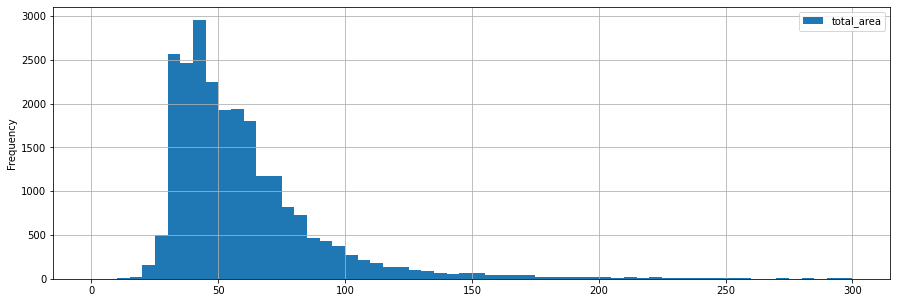

In [34]:
data.plot(y = 'total_area', kind = 'hist', bins = 60, grid=True, figsize = (15,5), range = (0,300))
data['total_area'].describe()

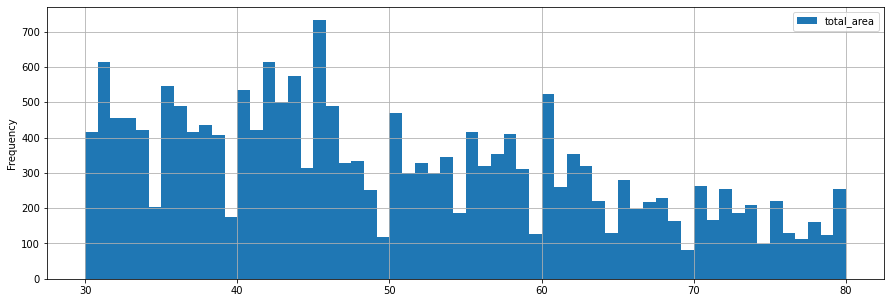

In [35]:
data.plot(y = 'total_area', kind = 'hist', bins = 60, grid=True, figsize = (15,5), range = (30,80));

изучим цену

count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

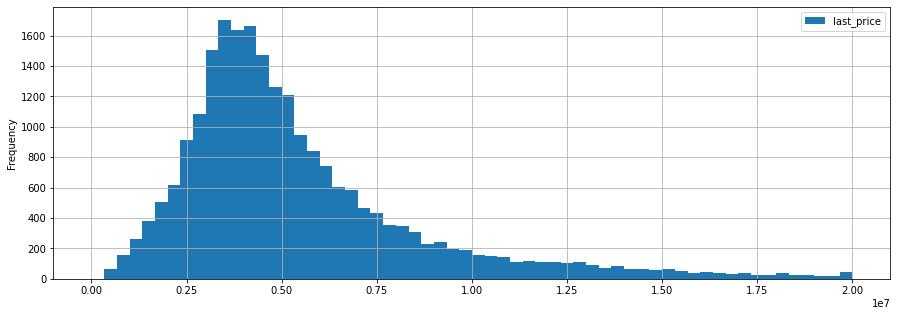

In [36]:
data.plot(y = 'last_price', kind = 'hist', bins = 60, grid=True, range = (0,20000000), figsize = (15,5))
data['last_price'].describe()

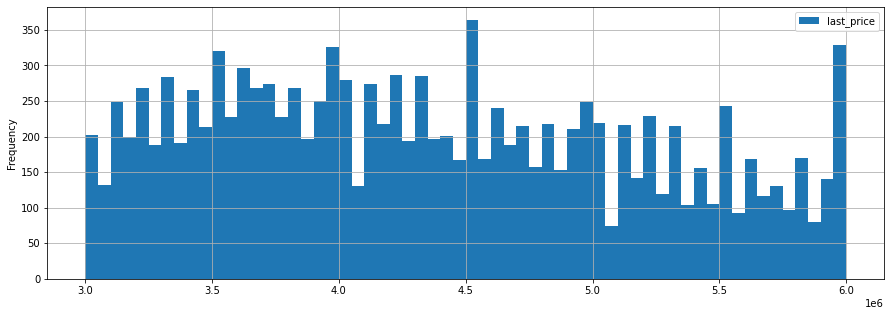

In [37]:
data.plot(y = 'last_price', kind = 'hist', bins = 60, grid=True, range = (3000000,6000000), figsize = (15,5));

Основная часть квартир имеет цену от 3 до 6 млн.

изучим число комнат

count   23,699.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

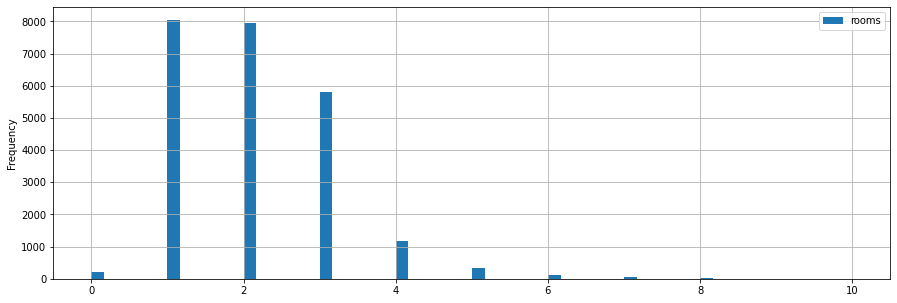

In [38]:
data.plot(y = 'rooms', kind = 'hist', bins = 60, grid=True, range = (0,10), figsize = (15,5))
data['rooms'].describe()

большинство квартир имеет 1 или 2 комнаты, чуть меньше 3 комнатных квартир, реже встречаются 4 комнатные, остальные случаи единичные

изучим высоту потолков

count   23,699.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

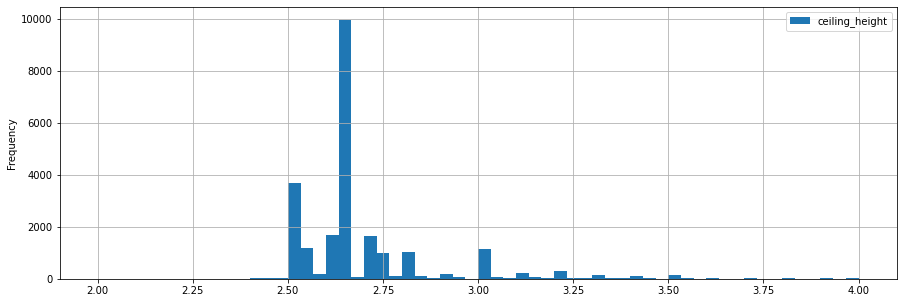

In [39]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 60, range = (2,4), grid=True, figsize = (15,5))
data['ceiling_height'].describe()

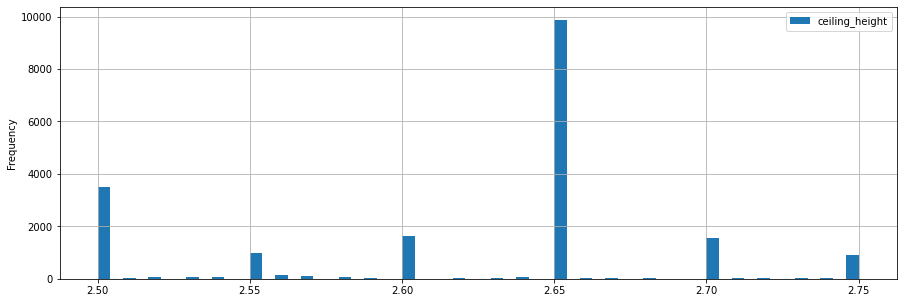

In [40]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 60, range = (2.5,2.75), grid=True, figsize = (15,5));

квартиры в большинстве случаев имеют потолки от 2,5-2,75.Пик на 2,65 обусловлен заполнением пропущенных данных медианным значением

Изучим время продажи квартиры. Построим гистограмму. 

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

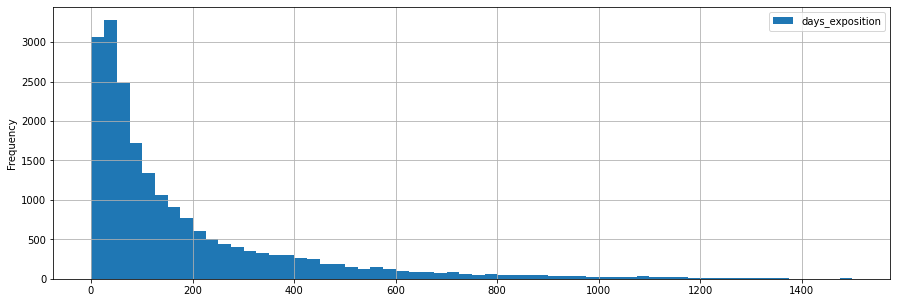

In [41]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 60, grid = True, range = (1,1500), figsize = (15,5))
data['days_exposition'].describe()

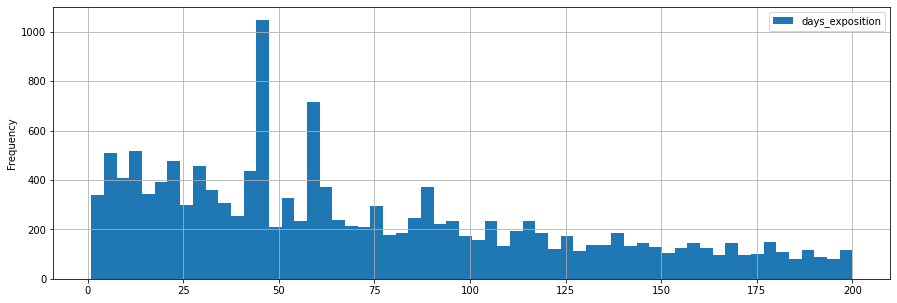

In [42]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 60, grid = True, range = (1,200), figsize = (15,5));

Основная часть квартир продается меньше чем за 100 дней, но есть объявления которые размещены в течение нескольких лет, возможно эти вартиры были проданы но объявления не сняты

По представленным выше показателям наблюдаются следующие редкие и выбивающиеся: <br/>
total_area - представелены квартиры с площадью 150 кв. м. и больше, возможно при вводе вручную, были допущены ошибки <br/>
rooms - представлены квартиры с количеством комнат 0, для студии и свободной планировки пользователи могли указывать 0 комнат <br/>
days_exposition - представлены квартиры с временем продажи несколько лет, возможно квартиры были проданы но не удалены из поиска <br/>

In [43]:
data.query('total_area > 150')['total_area'].count()

564

In [44]:
data = data.query('total_area < 150')

In [45]:
data.query('days_exposition > 730')['days_exposition'].count()

712

In [46]:
data = data.query('days_exposition <= 730')

Оставим только кваритры проданные меньше чем за 2 года

In [47]:
print(data.query('rooms == 0')['rooms'].count())
print(data.query('rooms == 0').query('open_plan == True or studio == True')['rooms'].count())

179
179


количество комнат 0 указано для вариантов студии или свободной планировки, эти строки удалять не будем

In [48]:
data.query('ceiling_height < 2.4 or ceiling_height > 5')['ceiling_height'].value_counts()

2.00      8
27.00     7
25.00     5
2.30      4
8.00      3
14.00     1
2.25      1
1.20      1
5.80      1
5.30      1
8.30      1
100.00    1
22.60     1
2.34      1
10.30     1
1.75      1
2.20      1
26.00     1
27.50     1
24.00     1
1.00      1
Name: ceiling_height, dtype: int64

Встречаются двузначные значения высоты потолков, судя по всему были допущены ошибки при ручном вводе(неверно поставлена запятая).</b> 
приближенными к реальности можно считать потолки в пределах от 2,25 до 5 метров</b> 
заменим двузначные значения на правильные</b> 
остальные удалим

In [49]:
data['ceiling_height'] = np.where((data['ceiling_height'] < 50) & (data['ceiling_height'] > 22.5), data['ceiling_height'] / 10, data['ceiling_height'])

In [50]:
data = data.query('ceiling_height < 5 and ceiling_height > 2.25')

In [51]:
data.query('last_price < 500000 or last_price > 100000000')['last_price'].value_counts()

450,000.00        4
470,000.00        3
490,000.00        2
430,000.00        1
12,190.00         1
440,000.00        1
124,000,000.00    1
122,000,000.00    1
480,000.00        1
Name: last_price, dtype: int64

встречаются цены меньше 500 000 и выше 100 000 000, по аналогии с высотой потолков, похоже что вызваны неверным ручным вводом</b> 
удалим эти значения

In [52]:
data = data.query('last_price < 100000000 and last_price > 500000')

удалено данных:

In [53]:
print('{:.1%}'.format(1 - len(data) / len(data_origin)))

18.4%


Проверим, зависит ли цена квадратного метра от общей площади квартиры, числа комнат, этажа (первого или последнего), удалённости от центра, от даты размещения: дня недели, месяца и года.

Изучим зависимость цены от общей площади

pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price')
pivot_table_total_area

0.7055759593440535

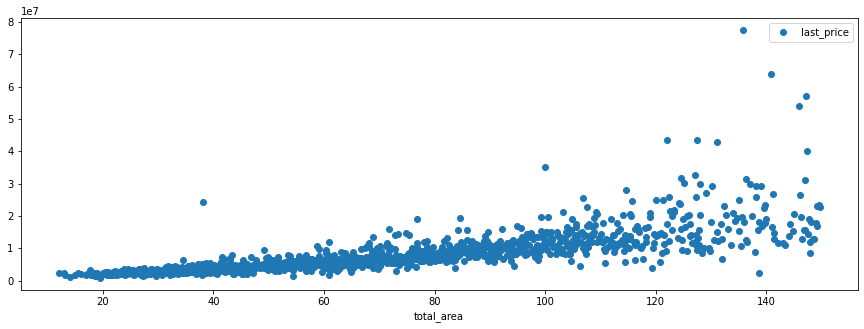

In [55]:
pivot_table_total_area.plot(style = 'o', figsize = (15,5))
data['total_area'].corr(data['last_price'])

чем выше общая площадь тем выше цена, наблюдаем сильную зависимость

Изучим зависимость цены от числа комнат.

In [56]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price')

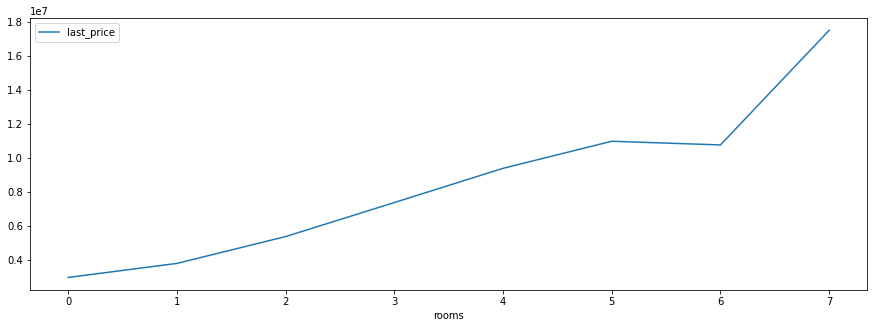

In [57]:
pivot_table_rooms.plot(figsize = (15,5));

Изучим зависимость цены от этажа (первого или последнего).

In [58]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price')

In [59]:
pivot_table_floor_category

,last_price
floor_category,
другой,"5,667,699.55"
первый,"4,269,802.56"
последний,"5,125,652.47"


на первом и последнем этажах квартиры самые дешевые. при этом квартиры на первом этаже дешевле чем на последнем

Изучим зависимость цены от удалённости от центра.

-0.3157842503275277

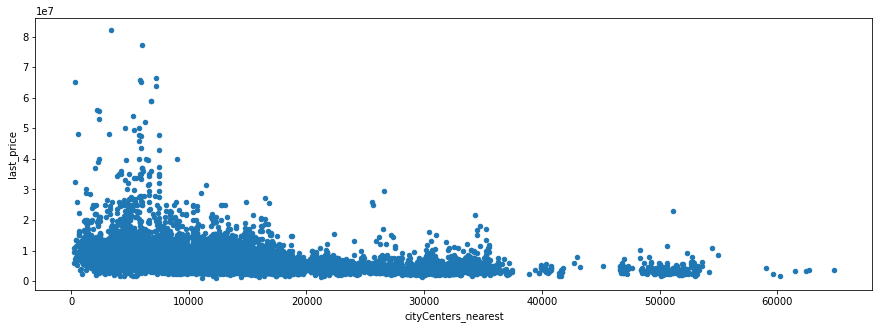

In [60]:
data.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', figsize = (15,5))
data['cityCenters_nearest'].corr(data['last_price'])

Самая дорогая стоимость квартир в радиусе 10 км от центра. в радиусе 20 км стоимость снижается по мере удаленности, далее изменения цены практически нет

Изучим зависимость цены от даты размещения: дня недели.

In [61]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price')

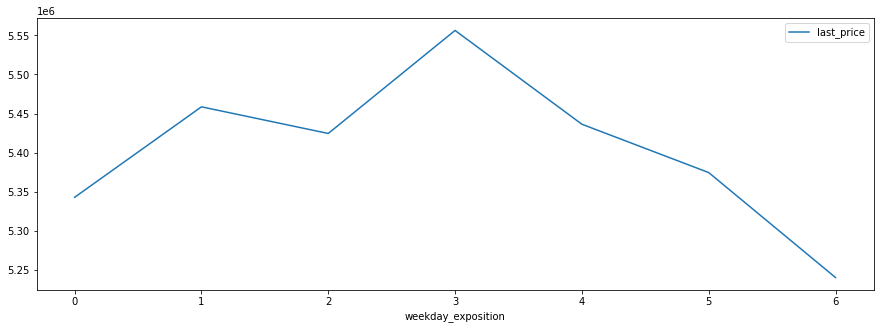

In [62]:
pivot_table_weekday_exposition.plot(figsize = (15,5));

стоимость квартир в зависимости от дня недели растет к четвергу, затем снижается, и имеет минимум в воскресенье

Изучим зависимость цены от даты размещения: месяца.

In [63]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price')

<AxesSubplot:xlabel='month_exposition'>

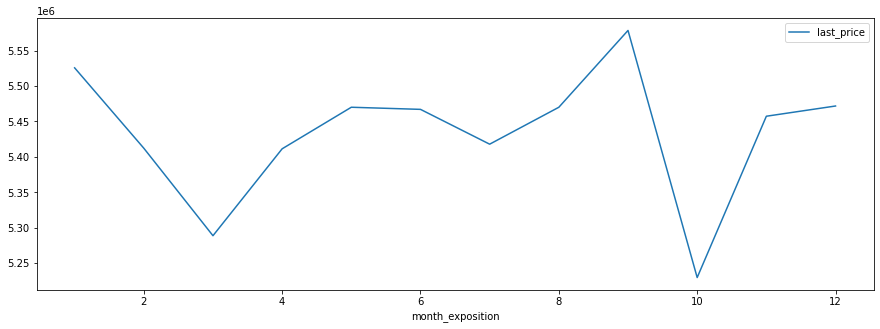

In [64]:
pivot_table_month_exposition.plot(figsize = (15,5))

в течение лета стоимость растет, самая высокая стоимость достигается к сентябрю, затем резкий спад и самая низкая стоимость наблюдается в октябре.

Изучим зависимость цены от даты размещения: года.

In [65]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price')

<AxesSubplot:xlabel='year_exposition'>

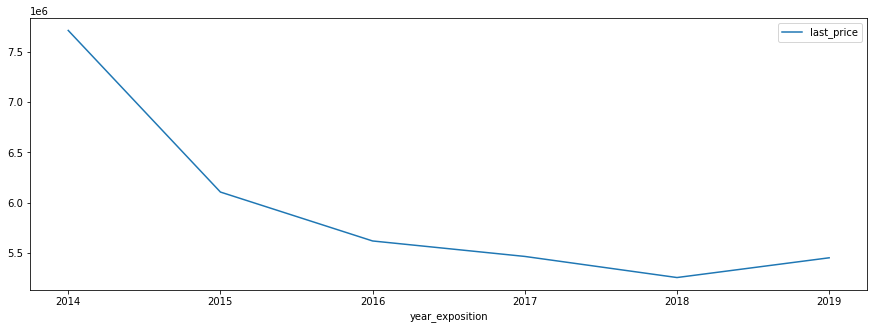

In [66]:
pivot_table_year_exposition.plot(figsize = (15,5))

с 2014 по 2016 год цена квадратного метра падала, далее до 2018 года падение замедлилось, с 2018до 2019 наблюдается начало роста цен.

Проанализируем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [67]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'last_price', aggfunc=['count', 'mean'])

In [68]:
locality_pivot_table.columns = ['count', 'mean']

In [69]:
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)

In [70]:
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,12738,"6,449,633.13"
посёлок Мурино,499,"3,649,668.30"
посёлок Шушары,397,"4,050,674.56"
Всеволожск,326,"3,689,731.29"
Колпино,301,"3,785,000.82"
посёлок Парголово,294,"4,388,246.46"
Пушкин,286,"5,750,728.55"
деревня Кудрово,280,"4,254,072.77"
Гатчина,254,"3,366,354.57"


<AxesSubplot:xlabel='locality_name'>

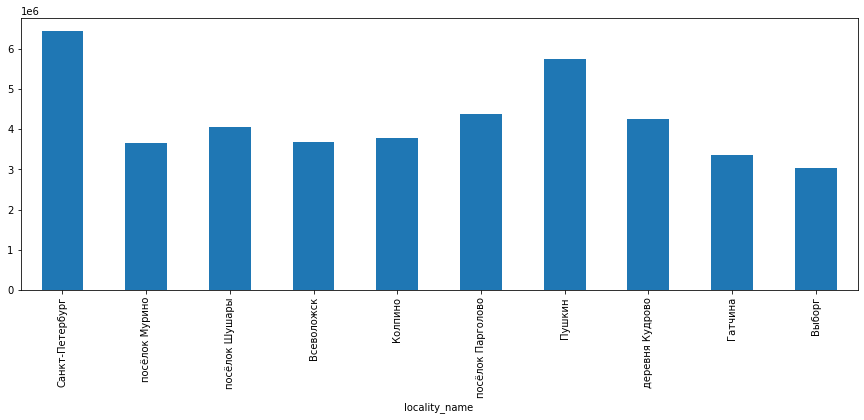

In [71]:
locality_pivot_table['mean'].plot(kind = 'bar', figsize = (15,5))

 самая высокая стоимость жилья в Санкт-Петербурге, самая низкая стоимость в Выборге. Чем крупнее населенный пункт(судя по количеству объявлений), тем выше цена жилья

Выясним, какая область входит в центр. Построим график цены в зависимости от удалённости от центра.

In [72]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000

In [73]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0)

In [74]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

In [75]:
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km > 0').pivot_table(index = 'cityCenters_nearest_km', values = 'price_square_meter', aggfunc = 'mean')

In [76]:
pivot_table_km

,price_square_meter
cityCenters_nearest_km,
1,"135,367.13"
2,"130,335.86"
3,"117,915.03"
4,"133,913.56"
5,"135,869.02"
6,"137,358.51"
7,"133,076.74"
8,"116,540.50"
9,"108,727.68"


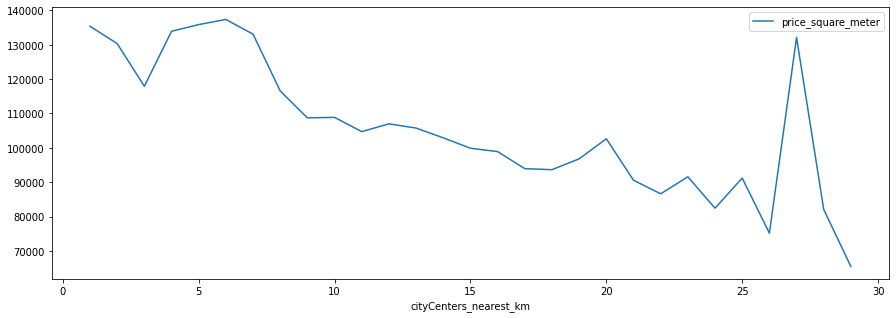

In [77]:
pivot_table_km.plot(figsize = (15,5));

падение цены на 16 процентов происходит при отдалении на расстояние более 7 км, следовательно этот радиус можно считать центральной зоной

Изучим отличаются ли параметры квартир в центре от квартир по всему городу?

выделим квартиры в центре в отдельный датафрейм

In [78]:
center_spb_data = data.query('cityCenters_nearest_km <= 7 and locality_name == "Санкт-Петербург"')

изучим общую площадь

count   2,610.00
mean       73.73
std        28.34
min        12.00
25%        50.72
50%        70.00
75%        93.00
max       149.20
Name: total_area, dtype: float64

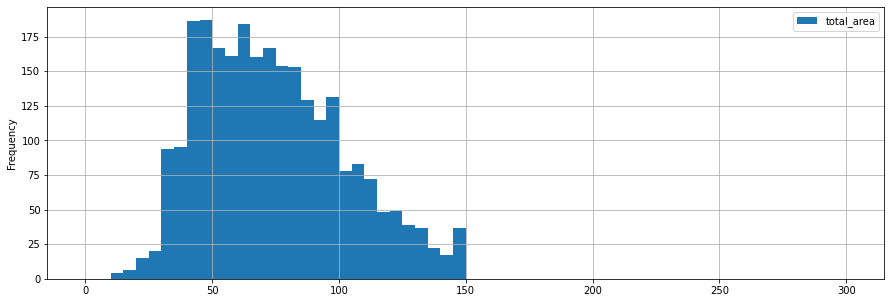

In [79]:
center_spb_data.plot(y = 'total_area', kind = 'hist', bins = 60, grid=True, figsize = (15,5), range = (0,300))
center_spb_data['total_area'].describe()

Большая часть квартир имеет площадь 40 кв.м. до 100 кв.м.<br>
в средем площадь квартир больше чем по общей выборке

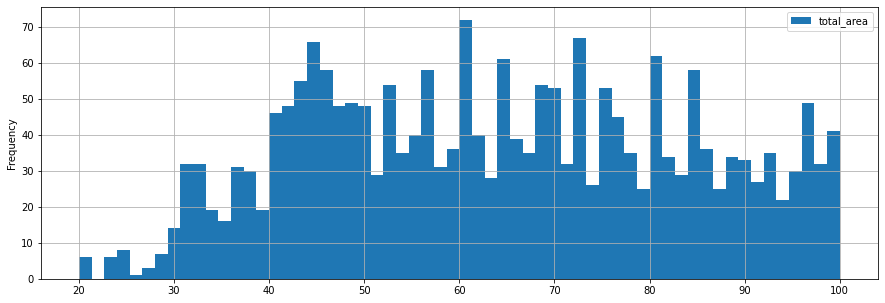

In [80]:
center_spb_data.plot(y = 'total_area', kind = 'hist', bins = 60, grid=True, figsize = (15,5), range = (20,100));

изучим цену

count        2,610.00
mean     9,922,234.29
std      7,222,390.15
min      1,600,000.00
25%      6,000,000.00
50%      8,000,000.00
75%     11,300,000.00
max     82,000,000.00
Name: last_price, dtype: float64

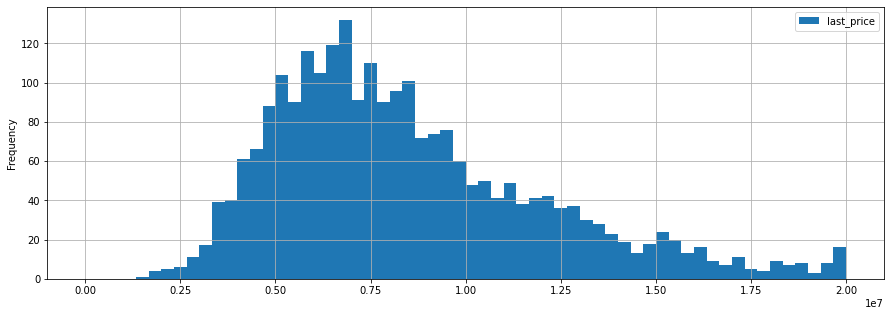

In [81]:
center_spb_data.plot(y = 'last_price', kind = 'hist', bins = 60, grid=True, range = (0,20000000), figsize = (15,5))
center_spb_data['last_price'].describe()

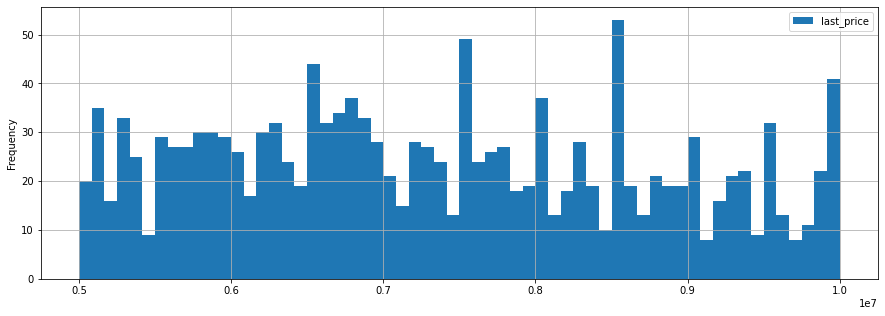

In [82]:
center_spb_data.plot(y = 'last_price', kind = 'hist', bins = 60, grid=True, range = (5000000,10000000), figsize = (15,5));

Основная часть квартир имеет цену от 5 до 10 млн.
в отличие от общей выборки квартиры стоят дороже( 3 до 6 млн.)

изучим число комнат

count   2,610.00
mean        2.47
std         1.07
min         0.00
25%         2.00
50%         2.00
75%         3.00
max         7.00
Name: rooms, dtype: float64

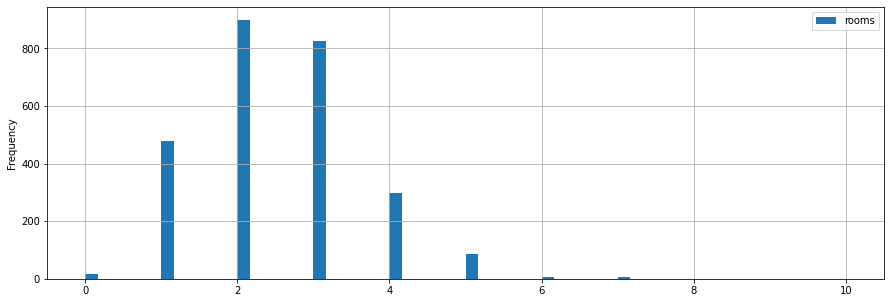

In [83]:
center_spb_data.plot(y = 'rooms', kind = 'hist', bins = 60, grid=True, range = (0,10), figsize = (15,5))
center_spb_data['rooms'].describe()

большинство квартир имеет 1, 2, 3 комнатны, реже встречаются 4 комнатные, остальные случаи единичные<br>
картина похожа, основная часть это 1,2,3 комнатыне квартиры

изучим высоту потолков

count   19,331.00
mean         2.68
std          0.19
min          2.26
25%          2.60
50%          2.65
75%          2.70
max          4.80
Name: ceiling_height, dtype: float64

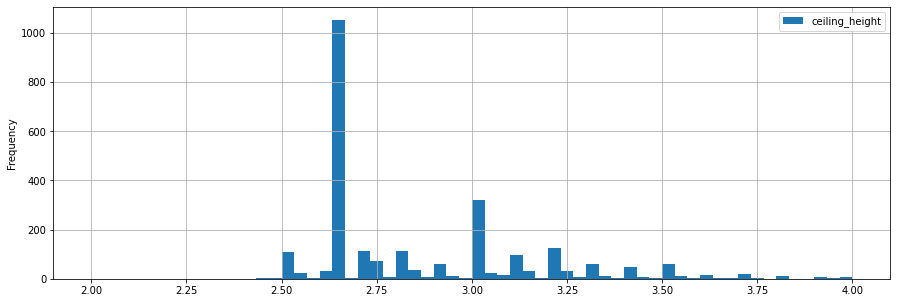

In [84]:
center_spb_data.plot(y = 'ceiling_height', kind = 'hist', bins = 60, range = (2,4), grid=True, figsize = (15,5))
data['ceiling_height'].describe()

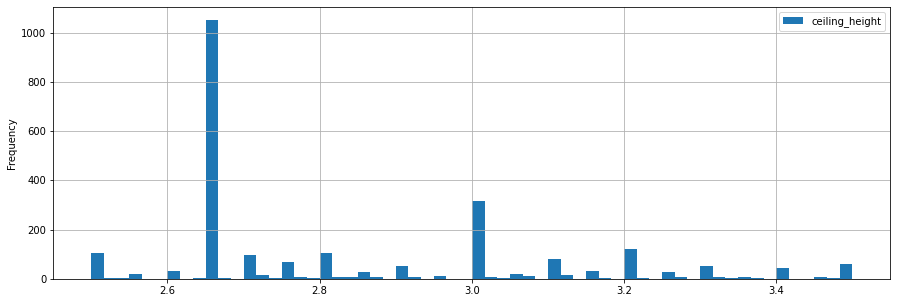

In [85]:
center_spb_data.plot(y = 'ceiling_height', kind = 'hist', bins = 60, range = (2.5,3.5), grid=True, figsize = (15,5));

квартиры в большинстве случаев имеют потолки от 2,5-3,5м<br>
Потолки в центральной части Петербурга в среднем выше чем по общей выборке

Зависимость стоимости от общей площади.

In [86]:
pivot_table_total_area = center_spb_data.pivot_table(index = 'total_area', values = 'last_price')

0.6197382910029822

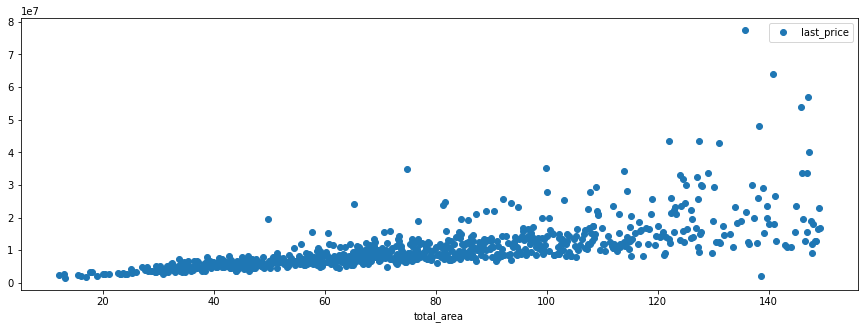

In [87]:
pivot_table_total_area.plot(style = 'o', figsize = (15,5))
center_spb_data['total_area'].corr(center_spb_data['last_price'])

Картина аналогична общей выборке<br/>
цена растет в зависимости от площади, но менее резко

Зависимость стоимости от количества комнат.

In [88]:
pivot_table_rooms_center_spb_data = center_spb_data.pivot_table(index = 'rooms', values = 'last_price')  

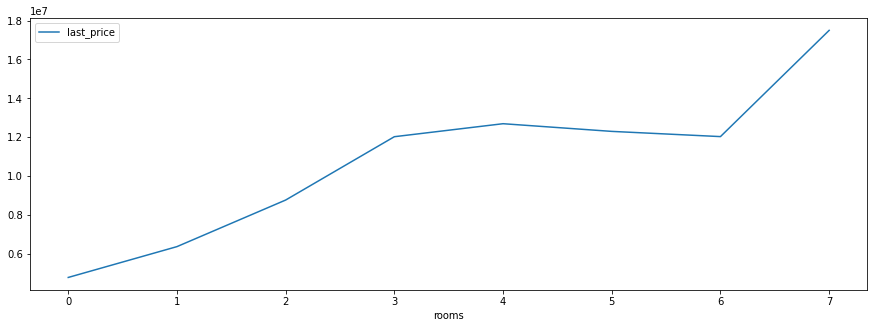

In [89]:
pivot_table_rooms_center_spb_data.plot(figsize = (15,5));

картина похожа на общую выборку<br/>
только тут стоимость 4,5,6 комнатных квартир практически одинакова

Зависимость стоимости от этажа.

In [90]:
center_spb_floor_category = center_spb_data.pivot_table(index = 'floor_category', values = 'last_price')
center_spb_floor_category

,last_price
floor_category,
другой,"10,477,412.86"
первый,"7,173,739.70"
последний,"9,449,241.08"


Закономерность такая же как в общей выборке, но квартиры на первом этаже в центральной части Петербурга стоят значительно ниже чем остальные.

Зависимость стоимости от удаленности от центра.

-0.03803327434194898

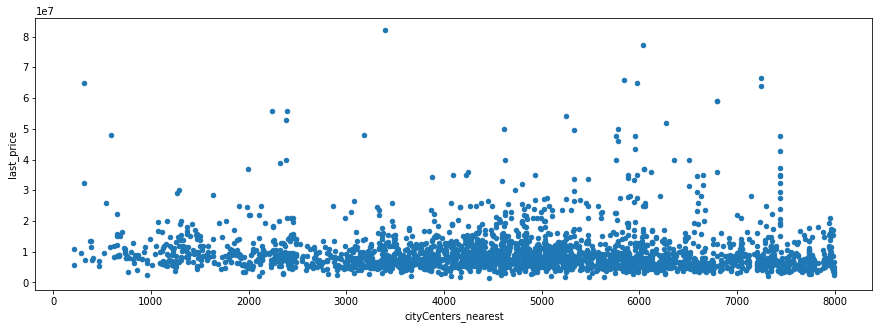

In [91]:
center_spb_data.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', figsize = (15,5))
center_spb_data['cityCenters_nearest'].corr(data['last_price'])

Зависимости нет в отличии от общей выборки.<br/>
В центральной части Петербурга стоимость схожих по параметрам квартир примерно одинакова

Зависимость стоимости от дня недели размещения объявления.

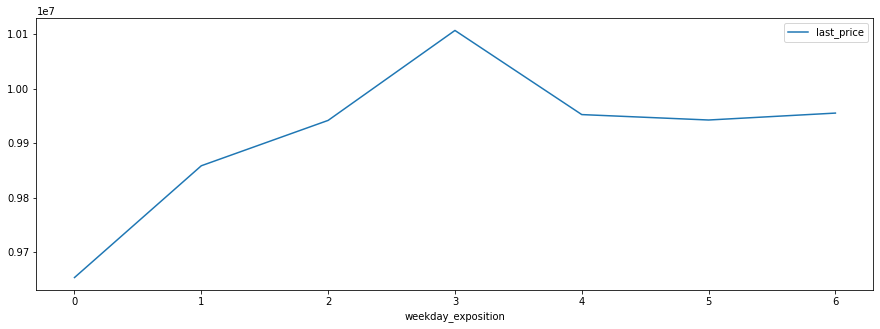

In [92]:
center_spb_data.pivot_table(index = 'weekday_exposition', values = 'last_price').plot(figsize = (15,5));

Также как и в общей выборке имеется рост к четвергу, оданко падение цен к воскресенью не такое сильное<br/>

Зависимость стоимости от месяца размещения объявления.

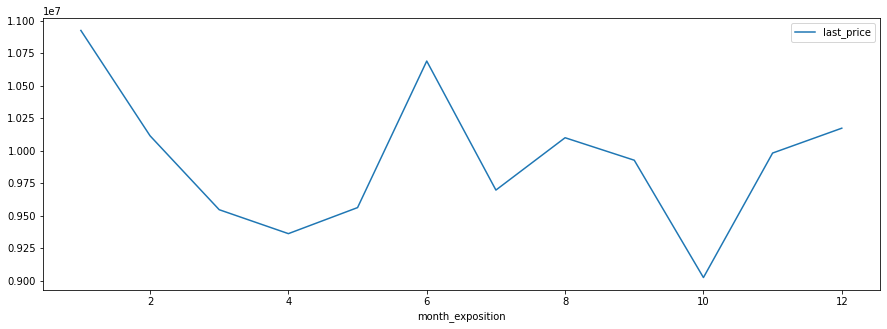

In [93]:
center_spb_data.pivot_table(index = 'month_exposition', values = 'last_price').plot(figsize = (15,5));

в отличие от общей выборки стоимость более равномерно распределена по месяцам, за исключением пиков цен в июне, декабре-январе

Зависимость стоимости от года размещения объявления.

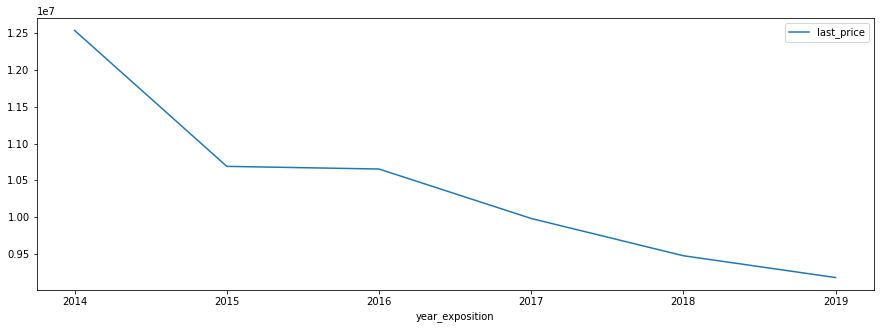

In [94]:
center_spb_data.pivot_table(index = 'year_exposition', values = 'last_price').plot(figsize = (15,5));

В отличие от общей выборки нет начала роста цен с 2018 года

## Общий вывод

В ходе исследования были обработаны пропущенные значения, произведена замена типов данных, в общий датафрейм добавлены столбцы с ценой квадратного метра жилья, дня недели, месяца и года размещения объявлений, добавлены категории по этажам квартир. Были определены аномалии в данных параметрах.

В ходе исследования, сделаны выводы о ценообразовании:<br/>
Наибольшее значение на цену квадратного метра квартры оказывает то в каком населенном пункте она находится. Самые дорогие кваритры в Санкт петербурге, тогда как в выборге цена практически в 2 раза меньше. Чем меньше населенный пункт, тем ниже цена.<br/>
В пределах каждого населенного пункта самые доргие квартиры располагаются в центральной части города.<br/>
на первом и последнем этажах квартиры самые дешевые. при этом квартиры на первом этаже дешевле чем на последнем<br/>
Метраж квартиры имеет прямое сильное влияение на цену<br/>
Наблюдается начало роста цен начиная с 2018 года<br/>
Наблюдается падение цен перед летним периодом и в начале осени в среднем на 5 процентов.<br/>
Наиболее дорогой квадратный метр имеют 1 комнатные квартиры в центре Петербурга.<br/>
<br/>
Замечены следующие наблюдения:<br/>
в выборке представелены квартиры с площадью 150 кв. м. и больше, возможно при вводе вручную, были допущены ошибки. <br/>
представлены квартиры с временем продажи несколько лет, возможно квартиры были проданы но не удалены из поиска. <br/>
большая часть квартир продается в пределах 100 дней<br/>
<br/>
Наибольшее влияение на цену в пределах одного рассматриваемого года, оказывает расположение квартиры относительно центра города (чем ближе к центру тем дороже), Город размещения квартиры (чем крупнее населенный пункт тем дороже), этаж кваритиры (1 этаж значительно ниже в цене), а также метраж квартиры.<br/>
<br/>
Аномальными значениями может считаться сильное отклонение от медианных цен на кв.м в конкретном населенном пункте, сгруппированных по расстоянию от центра, и по этажам.<br/>
А также квартиры с площадью более 150 кв.м. и временем размещения более 1 года.
